<a href="https://colab.research.google.com/drive/1zBZPgdFkfOmrs_ve_C4vcaSjtx58YC_D#scrollTo=9aEgpNlDodeF"
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller 2




MINE-4101: Applied Data Science  Univerisdad de los AndesIntegrantes:

- Lina Ojeda - 202112324 - l.ojedaa@uniandes.edu.co
- William Toro - 201112526 - wy.toro993@uniandes.edu.co

**Dataset:** Apartamentos[[dataset](https://github.com/lojedaa/Taller_2_ciencia_de_datos/blob/main/Taller%202/apartamentos.csv) | [dictionary](https://github.com/lojedaa/Taller_2_ciencia_de_datos/blob/main/Taller%202/Diccionario%20de%20datos%20-%20apartamentos.html)].



In [1]:
!pip install lime
!pip install --upgrade xgboost shap
!pip install catboost



# 0. Importaciones, configuraciones e instalaciones

In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.neighbors import BallTree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import lime
import lime.lime_tabular

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# 1. Carga de datos y limpieza basica

In [4]:
url_apartamentos = "https://raw.githubusercontent.com/lojedaa/Taller_2_ciencia_de_datos/refs/heads/main/Taller%202/apartamentos.csv"
url_diccionario = "https://raw.githubusercontent.com/lojedaa/Taller_2_ciencia_de_datos/refs/heads/main/Taller%202/Diccionario%20de%20datos%20-%20apartamentos.html"

df_ini = pd.read_csv(url_apartamentos)
diccionario = pd.read_html(url_diccionario)


Se cargan los archivos directamente desde un raw del repositorio de GitHub.
El dataset principal corresponde a la información de apartamentos, y el archivo HTML contiene el diccionario con la descripción de cada columna.

In [5]:
print(diccionario)

[                    Columna                                        Descripción
0                    codigo       Código único que identifica cada apartamento
1            tipo_propiedad        Tipo de propiedad (apartamento, casa, etc.)
2            tipo_operacion          Tipo de operación (venta, arriendo, etc.)
3              precio_venta                Precio de venta del apartamento COP
4           precio_arriendo             Precio de arriendo del apartamento COP
5                      area           Área del apartamento en metros cuadrados
6              habitaciones             Número de habitaciones del apartamento
7                     banos                    Número de baños del apartamento
8            administracion  Valor de la cuota de administración del aparta...
9              parqueaderos                 Número de parqueaderos disponibles
10                   sector  Sector o zona en la que se encuentra el aparta...
11                  estrato             Estrato soc

In [6]:
df_ini.head(5)

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,BRITALIA,3.0,ENTRE 10 Y 20 ANOS,4.746592,-74.057571,CARRERA 55A # 163-35,"apartamento en venta de 76m2, con vista exteri...",habi.co,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,https://habi.co/page-data/venta-apartamentos/1...,[{'fecha': {'$date': '2024-07-03T23:27:30.843Z...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,SAN CRISTOBAL NORTE,3.0,MAS DE 20 ANOS,4.730111,-74.028170,CARRERA 7F # 153 - 75,"apartamento en venta de 60m2, con vista interi...",habi.co,2024-09-03 23:46:46.547,2024-07-03 23:27:31.667,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,LA SABANA,3.0,ENTRE 0 Y 5 ANOS,4.607378,-74.082648,CARRERA 69C #2 - 60,"apartamento en venta de 54m2, con vista exteri...",habi.co,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,158000000.0,43.0,2.0,2.0,106600.0,0.0,TIBABUYES,2.0,ENTRE 10 Y 20 ANOS,4.740109,-74.113675,CALLE 131C # 126-95,"apartamento en venta de 43 m2, con vista inter...",habi.co,2024-07-10 18:19:03.061,2024-07-03 23:27:32.141,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0,PARQUE ZONAL LA GAITANA,539.98,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,222800000.0,48.0,3.0,2.0,151000.0,0.0,VERBENAL,3.0,MAS DE 20 ANOS,4.763900,-74.025280,CARRERA 5 # 187-15,"apartamento duplex en venta de 48m2, con vista...",habi.co,2024-09-03 23:46:46.592,2024-07-03 23:27:32.361,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0


In [7]:
df_ini.shape

(43013, 46)

In [8]:
df_ini.dtypes

,0
_id,object
codigo,object
tipo_propiedad,object
tipo_operacion,object
precio_venta,float64
area,float64
habitaciones,float64
banos,float64
administracion,float64
parqueaderos,float64


Al comparar el diccionario con el DataFrame vimos que varios tipos de datos no coinciden con lo esperado.
Algunas columnas que deberían ser numéricas estaban como texto, y varias variables que son claramente binarias aparecían mezclando valores como 0, 1, 0.0 o incluso valores raros.
Antes de avanzar con la limpieza principal, se organizan estos tipos de datos para que tengan el formato correcto y evitar errores más adelante.


(**completar y mejorar redaccion** )

In [9]:
bin_cols = [
    'jacuzzi','chimenea','permite_mascotas','gimnasio','ascensor','conjunto_cerrado',
    'piscina','salon_comunal','terraza','vigilancia',
    'is_cerca_estacion_tm','is_cerca_parque', 'piso', 'closets'
]

for col in bin_cols:
    print(col, df_ini[col].dropna().unique())


jacuzzi [0. 1.]
chimenea [0.]
permite_mascotas [0.]
gimnasio [0. 1.]
ascensor [0. 1.]
conjunto_cerrado [1. 0.]
piscina [0. 1.]
salon_comunal [0.]
terraza [0. 1.]
vigilancia [0. 1.]
is_cerca_estacion_tm [0 1]
is_cerca_parque [1 0]
piso []
closets []


Se identificaron manualmente todas las columnas que representan un sí/no, y se verificaron sus valores únicos.
Como estaban inconsistentes, se estandarizan a un único formato (TRUE/FALSE).

In [10]:
columnas_booleanas = []
for columna in df_ini.columns:
    valores = set(df_ini[columna].dropna().unique())
    if valores.issubset({0, 1, 0.0, 1.0, True, False}):
        columnas_booleanas.append(columna)

columnas_numericas = [
    "codigo",
    "precio_venta",
    "precio_arriendo",
    "area",
    "habitaciones",
    "banos",
    "administracion",
    "parqueaderos",
    "estrato",
    "piso",
    "closets",
    "latitud",
    "longitud",
    "distancia_estacion_tm_m",
    "distancia_parque_m"
]

columnas_fecha = [
    "datetime",
    "last_view"
]

columnas_texto = [
    "tipo_propiedad",
    "tipo_operacion",
    "sector",
    "estado",
    "localidad",
    "barrio",
    "parque_cercano",
    "estacion_tm_cercana",
    "antiguedad",
    "descripcion",
    "direccion",
    "compañia",
    "website",
    "url"
]


for col in columnas_booleanas:
    df_ini[col] = df_ini[col].astype(bool)



for col in columnas_numericas:
    df_ini[col] = pd.to_numeric(df_ini[col], errors='coerce')

for col in columnas_booleanas:
    df_ini[col] = df_ini[col].astype(int)

for col in columnas_fecha:
    df_ini[col] = pd.to_datetime(df_ini[col], errors='coerce')


for col in columnas_texto:
    df_ini[col] = df_ini[col].astype('object')




De forma manual se agruparon las columnas según su tipo esperado: categóricas, numéricas, booleanas y de fecha.
Luego se aplicó la conversión correspondiente para que cada una quedara en el formato adecuado.
Esto asegura que el DataFrame quede consistente y que no tengamos errores más adelante durante el análisis o el modelado.

In [11]:
df_ini.dtypes

,0
_id,object
codigo,float64
tipo_propiedad,object
tipo_operacion,object
precio_venta,float64
area,float64
habitaciones,float64
banos,float64
administracion,float64
parqueaderos,float64


Se verifican los tipos modificados.

In [12]:
columnas_seleccionadas = [
    "tipo_propiedad",
    "tipo_operacion",
    "habitaciones",
    "banos",
    "parqueaderos",
    "estrato",
    "antiguedad",
    "website",
    "estado",
    "jacuzzi",
    "piso",
    "closets",
    "chimenea",
    "permite_mascotas",
    "gimnasio",
    "ascensor",
    "conjunto_cerrado",
    "piscina",
    "salon_comunal",
    "terraza",
    "vigilancia",
    "coords_modified",
    "localidad",
    "is_cerca_parque",
    "is_cerca_estacion_tm"
]

for col in columnas_seleccionadas:
    print(f"\n--- {col} ---")
    print(df_ini[col].value_counts(dropna=False))



--- tipo_propiedad ---
tipo_propiedad
APARTAMENTO                  42943
CASA CON CONJUNTO CERRADO       60
CASA                            10
Name: count, dtype: int64

--- tipo_operacion ---
tipo_operacion
VENTA               27270
ARRIENDO            15515
VENTA Y ARRIENDO      228
Name: count, dtype: int64

--- habitaciones ---
habitaciones
3.0    22818
2.0    10625
1.0     5309
4.0     3825
5.0      433
6.0        1
7.0        1
NaN        1
Name: count, dtype: int64

--- banos ---
banos
2.0    14825
3.0    10605
4.0     6615
1.0     6614
5.0     4329
0.0       23
6.0        1
NaN        1
Name: count, dtype: int64

--- parqueaderos ---
parqueaderos
 2.0     15525
 1.0     12678
 0.0      6615
 3.0      5045
 4.0      3143
 10.0        2
 20.0        2
-2.0         1
 NaN         1
 30.0        1
Name: count, dtype: int64

--- estrato ---
estrato
6.0    19011
4.0     8842
5.0     7556
3.0     6085
2.0     1402
1.0      105
0.0       11
NaN        1
Name: count, dtype: int64

--- 

Se revisaron los conteos de valores de varias columnas para entender mejor la distribución del dataset. En general se observó lo siguiente:
- Tipo de propiedad y tipo de operación: están muy concentrados en pocas categorías (por ejemplo, la mayoría son apartamentos y ventas/arriendos). Esto confirma que no hay que hacer una limpieza compleja aquí.
- Habitaciones, baños y parqueaderos: siguen patrones lógicos, aunque aparecen algunos valores extraños (como parqueaderos = 20 o 30). Más adelante podrían tratarse como outliers.
- Estrato y antigüedad: tienen categorías bien definidas y consistentes, sin valores atípicos importantes.
- Estado y website: también concentrados en pocas categorías, lo cual facilita el modelad, pero no aportaria mucho para este.
- Variables binarias: la mayoría están muy desbalanceadas (especialmente jacuzzi, chimenea, terraza, etc.).
- Localidad: distribución esperada, con mayor presencia en zonas de alta actividad inmobiliaria.

En general, la revisión confirma que las columnas tienen valores razonables, con algunos casos puntuales que después se podrían ajustar o tratar como outliers.

In [13]:
df_ini.isna().sum()

,0
_id,0
codigo,42219
tipo_propiedad,0
tipo_operacion,0
precio_venta,15429
area,0
habitaciones,1
banos,1
administracion,7925
parqueaderos,1


In [14]:
columnas_eliminar = [
    "_id",
    "url",
    "website",
    "descripcion",
    "direccion",
    "timeline",
    "compañia",
    "coords_modified",
    "piso",
    "closets",
    "website",
    "codigo"
    ""
]

df_ini = df_ini.drop(columns=columnas_eliminar, errors="ignore")


df_ini = df_ini[~df_ini["precio_venta"].isna()]


Al revisar los valores faltantes y el contenido de cada columna, se identificaron varias variables que no aportan información útil para predecir el precio del inmueble, presentan porcentajes muy altos de nulos o simplemente corresponden a información técnica del proceso de extracción que no describe realmente al apartamento.
Por esta razón se eliminaron las siguientes columnas:

- _id y codigo: identificadores del registro; no describen características del inmueble y ya contamos con un identificador único.
- url: enlace del anuncio; información totalmente externa e irrelevante para el modelo.
- website: portal donde se publicó el anuncio; no afecta el valor real del inmueble y solo introduce ruido.
- descripcion: texto libre no estructurado, contiene información redundante y difícil de procesar.
- direccion: texto poco estandarizable, con más del 70% de nulos; su información se reemplaza mejor con latitud y longitud.
- compañía: inmobiliaria que publicó el anuncio; no aporta características del inmueble y tiene muchos nulos.
- coords_modified: variable técnica sin relevancia para el análisis.
- piso y closets: ambas con más del 98% de valores nulos, lo que impide una imputación confiable y no aportan valor al modelo.

Finalmente, se eliminaron todas las filas donde precio_venta está vacío.
La razón es que precio_venta es la variable objetivo y no se puede imputar ni estimar sin introducir sesgos graves que afectarían la calidad del modelo.

In [15]:
columnas_eliminar = df_ini.columns[df_ini.isna().sum() <= 10]
columnas_eliminar

Index(['tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'parqueaderos', 'estrato', 'antiguedad',
       'latitud', 'longitud', 'last_view', 'datetime', 'jacuzzi', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'localidad',
       'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque'],
      dtype='object')

In [16]:
filas_antes = df_ini.shape[0]
df_ini = df_ini.dropna(subset=columnas_eliminar).reset_index(drop=True)
filas_despues = df_ini.shape[0]

print("Filas eliminadas:", filas_antes - filas_despues)

Filas eliminadas: 14


Se identificaron las columnas que tenían muy pocos valores faltantes (≤ 10 nulos).
Estas columnas son consideradas más “sensibles”, por lo que cualquier fila con un nulo en ellas se elimina para mantener la consistencia del dataset.
Esto resultó en la eliminación de solo 14 filas, lo cual es mínimo comparado con el tamaño total de datos y ayuda a asegurar que las variables más importantes queden completamente limpias antes de continuar.

In [17]:
df_ini.isna().sum()

,0
tipo_propiedad,0
tipo_operacion,0
precio_venta,0
area,0
habitaciones,0
banos,0
administracion,2444
parqueaderos,0
sector,776
estrato,0


In [18]:
df_ini.describe()

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,latitud,longitud,last_view,datetime,precio_arriendo,jacuzzi,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,distancia_estacion_tm_m,is_cerca_estacion_tm,distancia_parque_m,is_cerca_parque
count,2.757000e+04,27570.000000,27570.000000,27570.000000,2.512600e+04,27570.000000,27570.000000,27570.000000,27570.000000,27570,27570,4.000000e+02,27570.000000,27570.0,27570.0,27570.000000,27570.000000,27570.000000,27570.000000,27570.0,27570.000000,27570.000000,27570.000000,27570.000000,27570.000000,27570.000000
mean,2.365305e+09,143.029371,2.746464,2.831810,5.061742e+06,1.760428,4.863547,4.688882,-74.063040,2024-08-04 03:43:35.210500608,2024-07-19 12:12:13.038920192,8.458840e+07,0.051650,0.0,0.0,0.322452,0.650852,0.432028,0.104498,0.0,0.001596,0.597171,1284.850580,0.204425,817.146976,0.260102
min,1.000000e+06,0.000000,1.000000,0.000000,1.000000e+00,-2.000000,0.000000,4.468629,-74.213645,2024-07-03 23:27:37.566000,2024-07-03 23:27:30.843000,7.400000e+05,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.940000,0.000000,0.220000,0.000000
25%,4.029000e+08,69.000000,2.000000,2.000000,3.500000e+05,1.000000,4.000000,4.665347,-74.068855,2024-08-02 19:15:50.705749760,2024-07-04 06:25:23.623499776,4.480000e+06,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,587.010000,0.000000,489.670000,0.000000
50%,7.000000e+08,110.000000,3.000000,3.000000,6.500000e+05,2.000000,5.000000,4.692954,-74.052000,2024-08-09 01:44:20.432999936,2024-07-07 21:45:31.573999872,7.500000e+06,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1196.700000,0.000000,763.415000,0.000000
75%,1.330000e+09,180.000000,3.000000,4.000000,1.199850e+06,2.000000,6.000000,4.716520,-74.043145,2024-08-13 18:35:12.672999936,2024-08-08 17:59:46.914999808,1.200000e+07,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1731.810000,0.000000,1090.862500,1.000000
max,4.250000e+12,19621.000000,7.000000,6.000000,3.500000e+09,30.000000,6.000000,4.819197,-74.014000,2024-09-03 23:49:48.998000,2024-09-03 23:49:02.032000,1.800000e+10,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,7095.660000,1.000000,6168.020000,1.000000
std,5.575612e+10,234.242946,0.781134,1.167733,7.650366e+07,1.092657,1.218914,0.038122,0.034125,NaN,NaN,9.942646e+08,0.221324,0.0,0.0,0.467423,0.476709,0.495367,0.305911,0.0,0.039918,0.490476,843.701766,0.403288,444.134697,0.438698


In [19]:
df_ini.columns.duplicated().sum()

np.int64(0)

In [20]:
df_ini.shape

(27570, 35)

In [21]:
df_ini["sector"] = df_ini["sector"].fillna("SIN_SECTOR")
df_ini["barrio"] = df_ini["barrio"].fillna("SIN_BARRIO")
df_ini["antiguedad"] = df_ini["antiguedad"].fillna("SIN_INFO")

In [22]:
df_ini.head(5)

,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,last_view,datetime,estado,precio_arriendo,jacuzzi,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,BRITALIA,3.0,ENTRE 10 Y 20 ANOS,4.746592,-74.057571,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,NaN,NaN,0,0,0,0,0,1,0,0,0,0,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,SAN CRISTOBAL NORTE,3.0,MAS DE 20 ANOS,4.730111,-74.028170,2024-09-03 23:46:46.547,2024-07-03 23:27:31.667,NaN,NaN,0,0,0,0,0,0,0,0,0,0,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,LA SABANA,3.0,ENTRE 0 Y 5 ANOS,4.607378,-74.082648,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,NaN,NaN,0,0,0,0,0,1,0,0,0,0,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0
3,APARTAMENTO,VENTA,158000000.0,43.0,2.0,2.0,106600.0,0.0,TIBABUYES,2.0,ENTRE 10 Y 20 ANOS,4.740109,-74.113675,2024-07-10 18:19:03.061,2024-07-03 23:27:32.141,NaN,NaN,0,0,0,0,0,1,0,0,0,0,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0,PARQUE ZONAL LA GAITANA,539.98,0
4,APARTAMENTO,VENTA,222800000.0,48.0,3.0,2.0,151000.0,0.0,VERBENAL,3.0,MAS DE 20 ANOS,4.763900,-74.025280,2024-09-03 23:46:46.592,2024-07-03 23:27:32.361,NaN,NaN,0,0,0,0,0,1,0,0,0,0,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0


Todavía quedaron nulos en algunas columnas porque son variables importantes y eliminarlas, o borrar sus filas, significaría perder una parte grande del dataset. Para decidir cómo tratarlos, se hara e la siguiente seccion una revisión rápida del comportamiento de cada variable: como realizar un describe extendido para revisar rangos y extremos, revisar los valores más altos y se generar histogramas y boxplots para identificar posibles outliers.
Con esto se pudo entender si los nulos provenían de errores en los datos o si simplemente hacían parte de la variabilidad normal, permitiendo tratarlos después sin afectar la calidad del dataset.

# 2.


 DESCRIBE EXTENDIDO 



,precio_venta,area,administracion,precio_arriendo,parqueaderos
count,2.757000e+04,27570.000000,2.512600e+04,4.000000e+02,27570.000000
mean,2.365305e+09,143.029371,5.061742e+06,8.458840e+07,1.760428
std,5.575612e+10,234.242946,7.650366e+07,9.942646e+08,1.092657
min,1.000000e+06,0.000000,1.000000e+00,7.400000e+05,-2.000000
50%,7.000000e+08,110.000000,6.500000e+05,7.500000e+06,2.000000
99%,5.428761e+09,462.437100,3.837750e+06,7.887540e+07,4.000000
99.5%,6.709154e+09,516.000000,6.424446e+06,2.229000e+09,4.000000
99.9%,1.354480e+10,724.089600,1.361750e+09,1.401000e+10,4.000000
max,4.250000e+12,19621.000000,3.500000e+09,1.800000e+10,30.000000



 TOP 10 VALORES MÁS ALTOS 


 Top 10 en precio_venta:


,precio_venta,area,administracion,precio_arriendo,parqueaderos,sector,barrio
23157,4.250000e+12,300.00,1.700000e+06,NaN,4.0,CHICO,LOS ROSALES
12349,3.300000e+12,204.00,1.500000e+06,NaN,3.0,CHICO,CHICO ORIENTAL
17792,3.240000e+12,418.00,2.489000e+06,NaN,4.0,CHICO,S.C. QUINTA CAMACHO
11265,3.000000e+12,326.00,1.000000e+06,NaN,4.0,CHICO,CHICO RESERVADO
3328,2.900000e+12,277.00,2.200000e+06,NaN,3.0,SANTA BARBARA,SANTA ANA ORIENTAL
3023,2.800000e+12,292.43,2.000000e+06,NaN,4.0,CHICO,CHICO RESERVADO
15442,2.100000e+12,211.00,1.300000e+09,NaN,3.0,SALITRE MODELIA,LA ESPERANZA NORTE
20718,1.980000e+12,272.00,2.200000e+06,NaN,4.0,COUNTRY,BOSQUES DE MEDINA
27254,1.800000e+12,180.00,1.500000e+06,NaN,4.0,SANTA BARBARA,SANTA BARBARA CENTRAL I Y II
15421,1.450000e+12,148.00,1.449000e+06,6000000.0,2.0,CHICO,S.C. ANTIGUO COUNTRY



 Top 10 en area:


,precio_venta,area,administracion,precio_arriendo,parqueaderos,sector,barrio
16178,1.200000e+09,19621.0,1000000.0,NaN,2.0,SANTA BARBARA,MOLINOS NORTE
26132,1.080000e+09,15413.0,950000.0,NaN,2.0,NIZA ALHAMBRA,URB. LAGOS DE CORDOBA
14186,6.800000e+08,9999.0,368000.0,NaN,1.0,COLINA Y ALREDEDORES,BOSQUE DE GRATAMIRA I Y II
7422,5.500000e+08,9242.0,440000.0,NaN,1.0,COLINA Y ALREDEDORES,URB. PARQUES DE LA COLINA
26037,6.500000e+08,8726.0,915000.0,NaN,3.0,COUNTRY,EL CONTADOR
16974,4.400000e+09,7685.0,NaN,NaN,4.0,ALTOS DE SUBA Y CERROS DE SAN JORGE,LA ARCANA (PREDIO)
24697,8.500000e+08,7263.0,600000.0,NaN,1.0,SANTA BARBARA,SAN PATRICIO
12607,3.400000e+08,6612.0,337000.0,NaN,1.0,FONTIBON TINTAL,VERACRUZ_II SECTOR
8791,2.850000e+08,6550.0,170000.0,NaN,1.0,ORQUIDEAS,VILLAS DE ANDALUCIA
5179,3.000000e+08,6434.0,170700.0,NaN,0.0,ENGATIVA,SANTA MARIA - RECINTO DE SAN FRANCISCO



 Top 10 en administracion:


,precio_venta,area,administracion,precio_arriendo,parqueaderos,sector,barrio
9519,4.200000e+09,330.00,3.500000e+09,NaN,4.0,SANTA BARBARA,EL PINAR DE SANTA BARBARA
13547,3.870000e+09,381.24,3.366000e+09,NaN,4.0,CHICO,S.C. CHICO NORTE
4439,2.000000e+09,359.00,2.918000e+09,NaN,4.0,CERROS DE SUBA,NIZA SUBA - BOSQUES DE ALAVA
9508,1.700000e+09,200.00,2.400000e+09,NaN,2.0,SANTA BARBARA,SANTA ANA ORIENTAL
3766,2.100000e+09,330.00,2.100000e+09,NaN,3.0,SANTA BARBARA,SANTA BARBARA OCCIDENTAL
575,2.000000e+09,390.00,2.000000e+09,NaN,4.0,SANTA BARBARA,SANTA BIBIANA
4695,3.500000e+09,400.00,2.000000e+09,NaN,4.0,SANTA BARBARA,SANTA ANA ORIENTAL
23665,3.800000e+09,343.00,2.000000e+09,NaN,3.0,SANTA BARBARA,CERROS DE SANTA BARBARA
13212,1.390000e+09,214.00,1.900000e+09,NaN,2.0,CHAPINERO ALTO,S.C. QUINTA CAMACHO
854,2.100000e+09,189.00,1.890000e+09,NaN,3.0,SANTA BARBARA,SANTA BARBARA ALTA



 Top 10 en precio_arriendo:


,precio_venta,area,administracion,precio_arriendo,parqueaderos,sector,barrio
9847,3.500000e+09,350.0,2000000.0,1.800000e+10,4.0,SANTA BARBARA,USAQUEN - CASA CRISTO REY
9467,1.650000e+09,165.0,1100000.0,8.000000e+09,3.0,CHAPINERO ALTO,S.C. LAS ACACIAS
7019,2.200000e+09,213.0,2324000.0,2.200000e+09,4.0,SANTA BARBARA,SANTA ANA ORIENTAL
18601,2.100000e+09,372.0,1615000.0,2.100000e+09,3.0,CHICO,LOS ROSALES
9962,7.300000e+09,320.0,2400000.0,5.846000e+07,4.0,CHICO,S.C. CHICO NORTE
8008,1.100000e+10,600.0,NaN,3.500000e+07,4.0,CHICO,LA CABRERA
9892,5.800000e+09,477.0,4200000.0,3.500000e+07,4.0,CHICO,S.C. CHICO NORTE
7206,7.110000e+09,395.0,2300000.0,3.000000e+07,4.0,CHICO,CHICO ORIENTAL
12815,6.000000e+09,287.0,2660000.0,3.000000e+07,4.0,CHICO,LOS ROSALES
5595,5.500000e+09,425.0,3900000.0,2.610000e+07,3.0,CHICO,BOSQUE EL RETIRO I SECTOR



 Top 10 en parqueaderos:


,precio_venta,area,administracion,precio_arriendo,parqueaderos,sector,barrio
23807,1.080000e+09,177.00,6.900000e+05,NaN,30.0,SANTA BARBARA,SANTA BARBARA CENTRAL IV SECTOR
518,2.500000e+09,382.00,1.229000e+06,NaN,4.0,COUNTRY,BOSQUES DE MEDINA
528,2.350000e+09,350.00,2.950000e+06,NaN,4.0,CEDRITOS,MONTEARROYO
548,1.850000e+09,300.00,2.500000e+06,NaN,4.0,SANTA BARBARA,S.C. LA CAROLINA
558,3.000000e+09,216.00,1.200000e+06,NaN,4.0,CHICO,S.C. EL CHICO
564,1.350000e+09,208.00,1.300000e+06,NaN,4.0,COUNTRY,RECODO DEL COUNTRY
570,2.800000e+09,223.89,8.910000e+05,NaN,4.0,CHICO,CHICO RESERVADO
571,1.980000e+09,250.00,2.300000e+06,NaN,4.0,COUNTRY,BOSQUES DE MEDINA
574,3.850000e+09,328.00,2.900000e+06,NaN,4.0,CHICO,S.C. EL NOGAL
575,2.000000e+09,390.00,2.000000e+09,NaN,4.0,SANTA BARBARA,SANTA BIBIANA


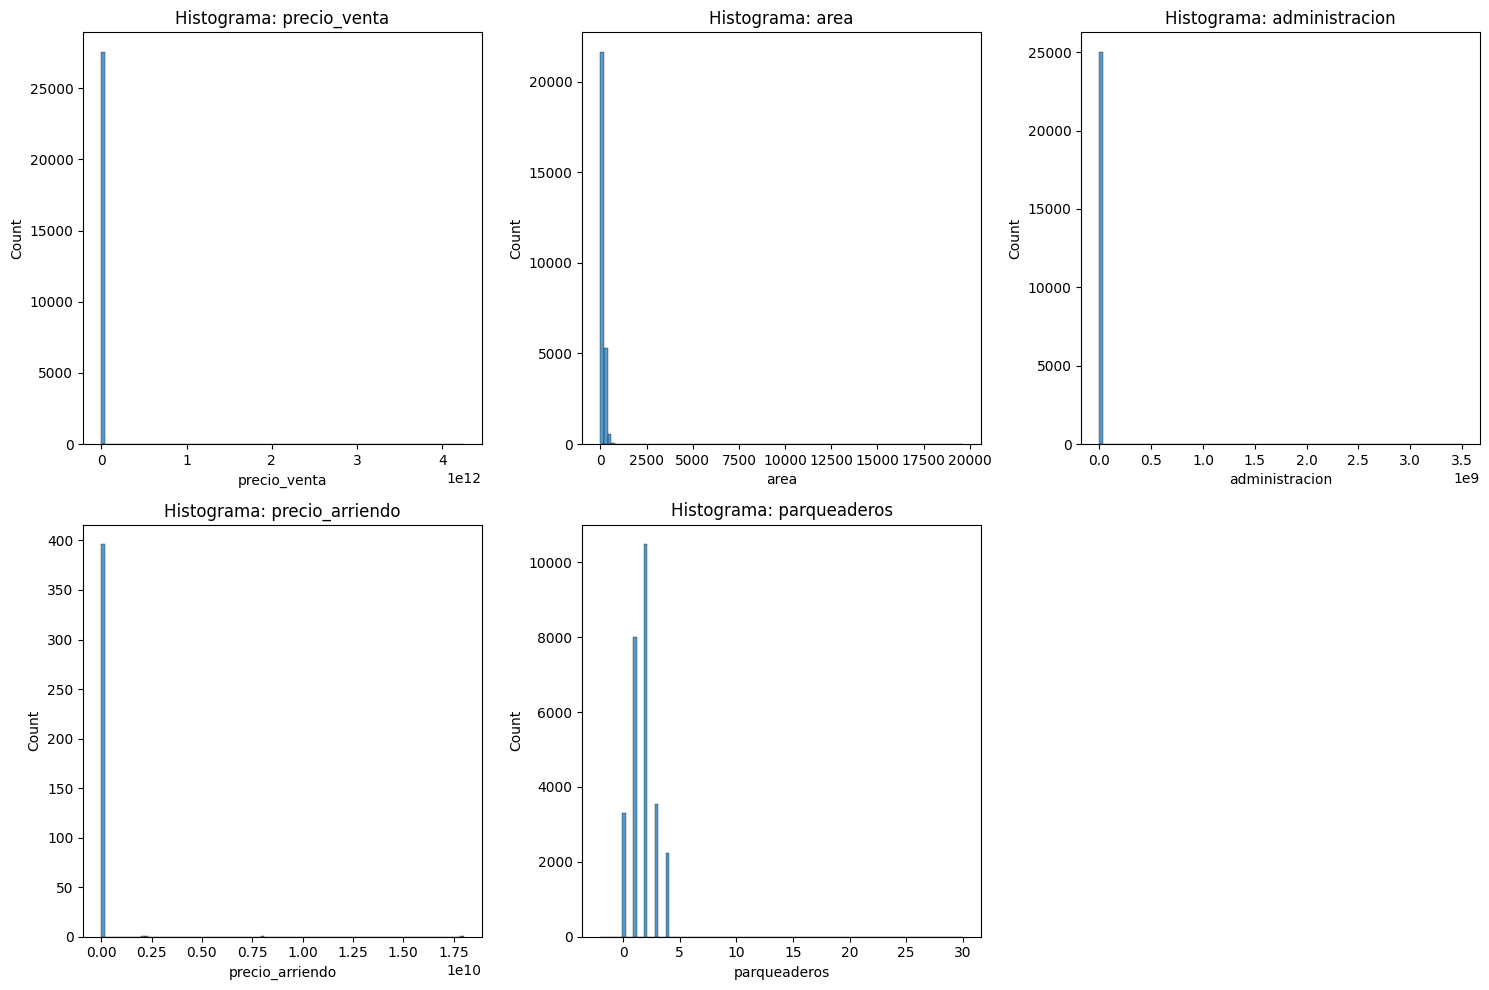

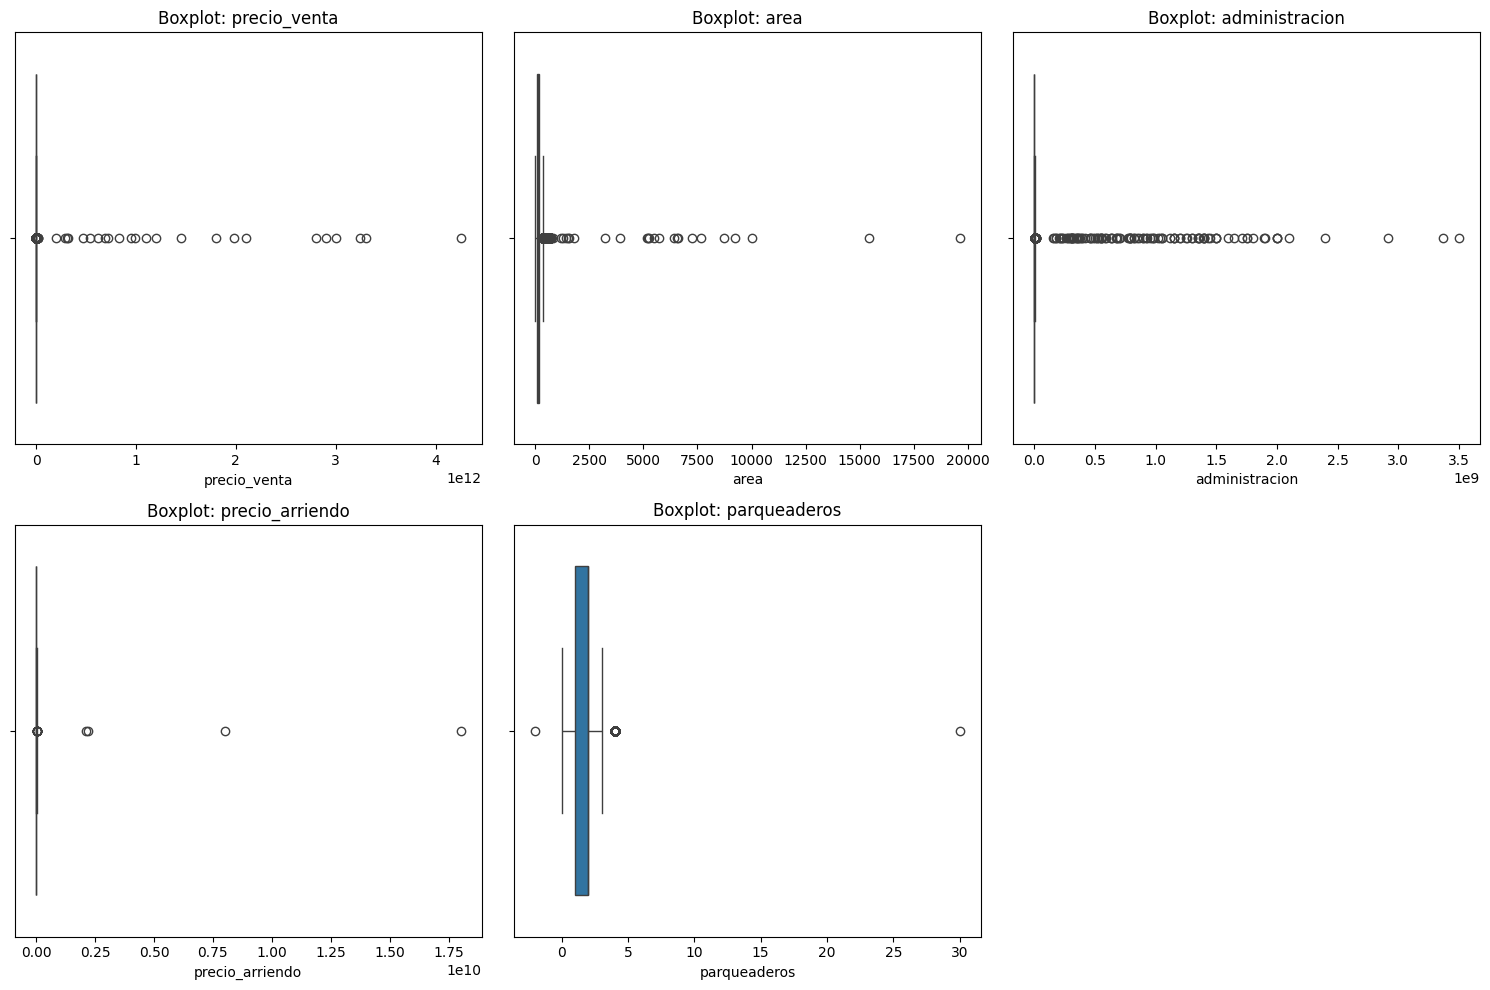


 OUTLIERS (IQR) 


Outliers detectados en precio_venta: 1944


,precio_venta
498,3.000000e+09
529,3.650000e+09
537,3.450000e+09
558,3.000000e+09
570,2.800000e+09



Outliers detectados en area: 1107


,area
518,382.0
528,350.0
529,400.0
575,390.0
576,360.0



Outliers detectados en administracion: 1111


,administracion
528,2950000.0
529,4279000.0
537,3200000.0
548,2500000.0
574,2900000.0



Outliers detectados en precio_arriendo: 16


,precio_arriendo
3808,2.500000e+07
5595,2.610000e+07
7019,2.200000e+09
7206,3.000000e+07
8008,3.500000e+07



Outliers detectados en parqueaderos: 2226


,parqueaderos
296,-2.0
518,4.0
528,4.0
548,4.0
558,4.0


In [23]:
variables = [
    "precio_venta",
    "area",
    "administracion",
    "precio_arriendo",
    "parqueaderos"
]


print("\n DESCRIBE EXTENDIDO \n")
display(df_ini[variables].describe(percentiles=[0.99, 0.995, 0.999]))


print("\n TOP 10 VALORES MÁS ALTOS \n")
for col in variables:
    print(f"\n Top 10 en {col}:")
    display(df_ini.nlargest(10, col)[variables + ["sector", "barrio"]])

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_ini[col].dropna(), bins=100, kde=False)
    plt.title(f"Histograma: {col}")
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for i, col in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_ini[col].dropna())
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

def outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

print("\n OUTLIERS (IQR) \n")
for col in variables:
    out_iqr = outliers_iqr(df_ini[col].dropna())
    print(f"\nOutliers detectados en {col}: {len(out_iqr)}")
    display(out_iqr.head())


In [24]:

p_low  = df_ini["precio_venta"].quantile(0.01)
p_high = df_ini["precio_venta"].quantile(0.90)
df_ini = df_ini[(df_ini["precio_venta"] >= p_low) &
                (df_ini["precio_venta"] <= p_high)]

a_low  = df_ini["area"].quantile(0.01)
a_high = df_ini["area"].quantile(0.90)
df_ini = df_ini[(df_ini["area"] >= a_low) &
                (df_ini["area"] <= a_high)]

adm_low  = df_ini["administracion"].quantile(0.01)
adm_high = df_ini["administracion"].quantile(0.90)
df_ini = df_ini[(df_ini["administracion"] >= adm_low) &
                (df_ini["administracion"] <= adm_high)]

pk_low  = df_ini["parqueaderos"].quantile(0.01)
pk_high = df_ini["parqueaderos"].quantile(0.90)
df_ini = df_ini[(df_ini["parqueaderos"] >= pk_low) &
                (df_ini["parqueaderos"] <= pk_high)]



In [25]:
cols_to_drop = [
    "sector",
    "barrio",
    "parque_cercano",
    "estacion_tm_cercana",
    "precio_arriendo",
    "datetime",
    "last_view",
    "estado"
]
df_ini = df_ini.drop(columns=cols_to_drop, errors="ignore")


Con base en la exploración inicial, no se imputaron los nulos de inmediato. Primero se realizó un análisis más profundo para detectar outliers usando IQR y revisar percentiles altos (0.99, 0.995, 0.999). Luego, se filtraron registros fuera de rangos razonables utilizando los percentiles 1% y 90% para precio_venta, área, administración y parqueaderos, lo que permitió quitar valores absurdos sin afectar la estructura del dataset, asi como los valores nulos.
Después de esta depuración, se eliminaron algunas columnas que seguían con nulos o que no aportaban valor al modelo, como sector, barrio, parque_cercano, estacion_tm_cercana, precio_arriendo, datetime y last_view. Estas variables eran difíciles de estandarizar, tenían demasiadas categorías o no agregaban información útil para predecir el precio del inmueble.

In [26]:
df_ini.shape

(17023, 27)

In [27]:
df_ini.isna().sum()

,0
tipo_propiedad,0
tipo_operacion,0
precio_venta,0
area,0
habitaciones,0
banos,0
administracion,0
parqueaderos,0
estrato,0
antiguedad,0


Se verifican los nulos

# 3. Aplicacion de modelos


## 3.0 Modelo CatBoost


Utilización de dataset unificado para implementación de modelo CatBoost

In [28]:
df_cb=df_ini

Para mejorar el clusterizado de los predios en venta en función de la localidad, se realiza la recategorización de una localidad_otras, donde se reunirán aquellas donde no se alcanza las 250 propiedades listadas

In [29]:
localidad_counts = df_cb["localidad"].value_counts()
localidades_menos_250 = localidad_counts[localidad_counts < 100].index
print("Localidades con menos de 250 propiedades:")
print(localidades_menos_250)

df_cb["localidad"] = df_cb["localidad"].replace(localidades_menos_250, "localidad_otras")

print("\nConteo actualizado:")
print(df_cb["localidad"].value_counts())

Localidades con menos de 250 propiedades:
Index(['PUENTE ARANDA', 'LOS MARTIRES', 'RAFAEL URIBE URIBE', 'SAN CRISTOBAL',
       'ANTONIO NARINO', 'USME', 'CANDELARIA', 'TUNJUELITO'],
      dtype='object', name='localidad')

Conteo actualizado:
localidad
USAQUEN            6192
SUBA               4130
CHAPINERO          2679
FONTIBON            883
KENNEDY             750
ENGATIVA            654
TEUSAQUILLO         584
localidad_otras     408
SANTA FE            243
CIUDAD BOLIVAR      199
BOSA                189
BARRIOS UNIDOS      112
Name: count, dtype: int64


Se enriquece el dataset utiliando las coordenadas geográficas para calcular la distancia de la propiedad al centro de la ciudad, Aeropuerto y Terminal de transporte terrestre.

In [30]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radio de la Tierra en km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [31]:
#Distancia a Plaza de Bolívar
df_cb["dist_centro"] = haversine(
    df_cb["latitud"], df_cb["longitud"],
    4.598145, -74.075876
)

#Distancia a Aeropuerto Int. ElDorado
df_cb["dist_aeropuerto"] = haversine(
    df_cb["latitud"], df_cb["longitud"],
    4.701553, -74.146712
)

#Distancia a Terminal de transportes
df_cb["dist_terminal"] = haversine(
    df_cb["latitud"], df_cb["longitud"],
    4.654486, -74.115486
)

Se crea la división de los datos en train, val y test

In [32]:
y1 = df_cb["precio_venta"]
X1 = df_cb.drop("precio_venta", axis=1)

X1_train, X1_temp, y1_train, y1_temp = train_test_split(
    X1, y1,
    test_size=0.30,
    random_state=42
)

X1_val, X1_test, y1_val, y1_test = train_test_split(
    X1_temp, y1_temp,
    test_size=0.50,
    random_state=42
)

print("Train shape:", X1_train.shape)
print("Val shape:", X1_val.shape)
print("Test shape:", X1_test.shape)

Train shape: (11916, 29)
Val shape: (2553, 29)
Test shape: (2554, 29)


Se busca agregar features en relación a la ubicación geográfica de los inmuebles y obtener un precio promedio de m2 de los 50 vecinos más cercanos para establecer un precio promedio únicamente sobre la data divida para entrenamiento.

In [33]:
# 1) DataFrame base de train con target y precio_m2
df_train_geo = X1_train.copy()
df_train_geo["precio_venta"] = y1_train
df_train_geo["precio_m2"] = df_train_geo["precio_venta"] / df_train_geo["area"]

# 2) Coordenadas del train en radianes (lat, lon)
train_coords_rad = np.radians(df_train_geo[["latitud", "longitud"]].values)

# 3) BallTree con métrica haversine (distancia sobre la esfera)
tree = BallTree(train_coords_rad, metric="haversine")

def compute_vecinos_feature(X_split, k=50):
    """
    Calcula el precio_m2 promedio de los k vecinos más cercanos en el entrenamiento
    para cada fila de X_split.
    """
    coords_split_rad = np.radians(X_split[["latitud", "longitud"]].values)

    # Nos aseguramos de no pedir más vecinos de los que hay en el train
    k_eff = min(k, len(df_train_geo))

    # dist: distancias (en radianes) | ind: índices en df_train_geo
    dist, ind = tree.query(coords_split_rad, k=k_eff)

    # Tomamos el precio_m2 de los vecinos
    precios_vecinos = df_train_geo["precio_m2"].values[ind]  # shape: (n_samples, k_eff)

    # Promedio por fila
    return precios_vecinos.mean(axis=1)

# 4) Crear el feature en cada split (pero SIEMPRE usando el TRAIN como base)
X1_train["precio_m2_vecinos_50"] = compute_vecinos_feature(X1_train, k=50)
X1_val["precio_m2_vecinos_50"]   = compute_vecinos_feature(X1_val,   k=50)
X1_test["precio_m2_vecinos_50"]  = compute_vecinos_feature(X1_test,  k=50)

print("Feature 'precio_m2_vecinos_50' creado en X_train/X_val/X_test.")
print(X1_train[["latitud", "longitud", "precio_m2_vecinos_50"]].head())

Feature 'precio_m2_vecinos_50' creado en X_train/X_val/X_test.
        latitud   longitud  precio_m2_vecinos_50
1076   4.669265 -74.085090          6.238311e+06
20236  4.721283 -74.029820          5.898978e+06
18554  4.685064 -74.045975          5.831333e+06
15053  4.722343 -74.028050          6.143527e+06
14209  4.649162 -74.061570          6.152538e+06


Se identifican las columnas categóricas para preparar el entrenamiento del modelo

In [34]:
cb_cat_features = X1_train.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas:", cb_cat_features)

Columnas categóricas: ['tipo_propiedad', 'tipo_operacion', 'antiguedad', 'localidad']


In [35]:
train_pool = Pool(X1_train, y1_train, cat_features=cb_cat_features)
val_pool   = Pool(X1_val,   y1_val,   cat_features=cb_cat_features)
test_pool  = Pool(X1_test,  y1_test,  cat_features=cb_cat_features)

Se entrena el modelo para luego evaluar su desempeño con los grupos de test y validación.

In [36]:

cb_model = CatBoostRegressor(
    iterations=2500,
    learning_rate=0.015,
    depth=8,
    loss_function="RMSE",
    eval_metric="RMSE",
    l2_leaf_reg=3,
    random_seed=42,
    verbose=100
)

cb_model.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=200
)

0:	learn: 326062879.8438712	test: 334290752.7878707	best: 334290752.7878707 (0)	total: 201ms	remaining: 8m 22s
100:	learn: 141087315.5837591	test: 151518779.5370062	best: 151518779.5370062 (100)	total: 8.75s	remaining: 3m 27s
200:	learn: 109692465.4542257	test: 121094909.5360479	best: 121094909.5360479 (200)	total: 16.5s	remaining: 3m 8s
300:	learn: 101441308.9983431	test: 113198848.7895491	best: 113198848.7895491 (300)	total: 19.7s	remaining: 2m 24s
400:	learn: 97606549.1707268	test: 110025651.4313768	best: 110025651.4313768 (400)	total: 22.9s	remaining: 2m
500:	learn: 95142325.1769300	test: 108426118.9739512	best: 108426118.9739512 (500)	total: 27.4s	remaining: 1m 49s
600:	learn: 92774692.8657803	test: 107170989.1124916	best: 107170989.1124916 (600)	total: 30.6s	remaining: 1m 36s
700:	learn: 90611093.4188501	test: 106230986.6667843	best: 106230986.6667843 (700)	total: 33.8s	remaining: 1m 26s
800:	learn: 88569521.2299622	test: 105549684.2937031	best: 105549684.2937031 (800)	total: 38.

In [37]:
# Grupo Validación
cb_preds_val = cb_model.predict(X1_val)
cb_rmse_val = np.sqrt(mean_squared_error(y1_val, cb_preds_val))
cb_mae_val  = mean_absolute_error(y1_val, cb_preds_val)
cb_r2_val   = r2_score(y1_val, cb_preds_val)
cb_mape_val = np.mean(np.abs((y1_val - cb_preds_val) / y1_val)) * 100


#Grupo test
cb_preds_test = cb_model.predict(X1_test)
cb_rmse_test = np.sqrt(mean_squared_error(y1_test, cb_preds_test))
cb_mae_test  = mean_absolute_error(y1_test, cb_preds_test)
cb_r2_test   = r2_score(y1_test, cb_preds_test)
cb_mape_test = np.mean(np.abs((y1_test - cb_preds_test) / y1_test)) * 100

print("\n=== MÉTRICAS CATBOOST ===")
print(f"VAL - MAE   : {cb_mae_val:,.2f}")
print(f"TEST - MAE  : {cb_mae_test:,.2f}")
print(f"VAL - RMSE  : {cb_rmse_val:,.2f}")
print(f"TEST - RMSE : {cb_rmse_test:,.2f}")
print(f"VAL - R²    : {cb_r2_val:.4f}")
print(f"TEST - R²   : {cb_r2_test:.4f}")
print(f"TEST - MAPE : {cb_mape_test:.2f}%")
print(f"VAL - MAPE  : {cb_mape_val:.2f}%")


=== MÉTRICAS CATBOOST ===
VAL - MAE   : 63,755,394.42
TEST - MAE  : 65,492,069.77
VAL - RMSE  : 101,464,467.50
TEST - RMSE : 108,131,538.72
VAL - R²    : 0.9099
TEST - R²   : 0.8929
TEST - MAPE : 10.73%
VAL - MAPE  : 10.56%


Se entrenó el modelo con los nuevos parámetros agregados en función de la ubicación geográfica del inmueble y el promedio de su costo de m2 de sus 50 propiedades más cercanas para el entrenamiento.

In [38]:
# Calculamos el error relativo porcentual
error_rel = np.abs((y1_test - cb_preds_test) / y1_test)

# Clasificamos los errores en niveles
def error_level(e):
    if e <= 0.10:
        return "Excelente (<=10%)"
    elif e <= 0.20:
        return "Bueno (10–20%)"
    else:
        return "Deficiente (>20%)"

error_categories = error_rel.apply(error_level)

# Creamos la matriz de desempeño
matriz_desempeno = error_categories.value_counts().rename_axis("Nivel de Desempeño").to_frame("Cantidad")
matriz_desempeno["Porcentaje"] = 100 * matriz_desempeno["Cantidad"] / len(error_categories)

matriz_desempeno

,Cantidad,Porcentaje
Nivel de Desempeño,,
Excelente (<=10%),1494,58.496476
Bueno (10–20%),717,28.073610
Deficiente (>20%),343,13.429914


## 3.1 Modelo XGboost

In [39]:
y = df_ini["precio_venta"]
X = df_ini.drop("precio_venta", axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (11916, 29)
Val shape: (2553, 29)
Test shape: (2554, 29)


Se separa el target del data set y se divide el data set en test, train y val

In [40]:
categorical_features = [
    "tipo_propiedad",
    "tipo_operacion",
    "localidad",
    "antiguedad"
]


numeric_features = [
    "area", "habitaciones", "banos", "administracion", "parqueaderos",
    "estrato", "latitud", "longitud",
    "distancia_estacion_tm_m", "distancia_parque_m",
    "jacuzzi", "chimenea", "permite_mascotas", "gimnasio",
    "ascensor", "conjunto_cerrado", "piscina", "salon_comunal",
    "terraza", "vigilancia",
    "is_cerca_estacion_tm", "is_cerca_parque"
]


Se separaron las columnas en variables categóricas y numéricas para poder aplicar las transformaciones adecuadas más adelante.
Las variables categóricas se codificarán con One-Hot Encoding, mientras que las numéricas se escalarán para que todas queden en rangos comparables antes de entrenar el modelo.

In [41]:
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

El pipeline aplica el scaler y el One-Hot Encoding

In [42]:
xgb_model = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.8,
    colsample_bytree=0.7,
    gamma=0.2,
    reg_alpha=10,
    reg_lambda=15,
    max_bin=512,
    tree_method="hist",
    base_score=0.5,
    random_state=42
)



In [43]:
pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

In [44]:
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'habitaciones',
                                                   'banos', 'administracion',
                                                   'parqueaderos', 'estrato',
                                                   'latitud', 'longitud',
                                                   'distancia_estacion_tm_m',
                                                   'distancia_parque_m',
                                                   'jacuzzi', 'chimenea',
                                                   'permite_mascotas',
                                                   'gimnasio', 'ascensor',
                                                   'conjunto_cerrado',
                                                   'piscina', 'salon_comunal',
                                                   'terraza', 'vig...
                              feature_types=None, feature_weights=None,
                              gamma=0.2, grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.02,
                              max_bin=512, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=4,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=3000,
                              n_jobs=None, num_parallel_tree=None, ...))])

Se entrenó el modelo usando un pipeline que incluye tanto el preprocesamiento (escalamiento y codificación) como el algoritmo final (XGBRegressor).
Esto permite que todo el flujo de transformación quede integrado y se aplique de manera automática durante el ajuste y las predicciones, evitando fugas de datos y asegurando reproducibilidad.

In [45]:
preds_val = pipeline_xgb.predict(X_val)
preds_test = pipeline_xgb.predict(X_test)

mae_val = mean_absolute_error(y_val, preds_val)
mae_test = mean_absolute_error(y_test, preds_test)

rmse_val = np.sqrt(mean_squared_error(y_val, preds_val))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))

r2_val = r2_score(y_val, preds_val)
r2_test = r2_score(y_test, preds_test)

mape_val = np.mean(np.abs((y_val - preds_val) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - preds_test) / y_test)) * 100

print("=== MÉTRICAS ===")
print(f"VAL  - MAE : {mae_val:,.2f}")
print(f"TEST - MAE : {mae_test:,.2f}")
print(f"VAL  - RMSE: {rmse_val:,.2f}")
print(f"TEST - RMSE: {rmse_test:,.2f}")
print(f"VAL  - R2  : {r2_val:.4f}")
print(f"TEST - R2 : {r2_test:.4f}")
print(f"VAL  - MAPE: {mape_val:.2f}%")
print(f"TEST - MAPE: {mape_test:.2f}%")


=== MÉTRICAS ===
VAL  - MAE : 62,918,576.09
TEST - MAE : 63,797,052.51
VAL  - RMSE: 101,139,056.79
TEST - RMSE: 106,724,221.05
VAL  - R2  : 0.9104
TEST - R2 : 0.8957
VAL  - MAPE: 10.36%
TEST - MAPE: 10.44%


Después del entrenamiento, se generaron las predicciones para los conjuntos de validación y prueba.
Posteriormente, se calcularon el MAE y el RMSE de el conjunto de validacion y test. Pero se hara una exploracion mas exhaustiva para entender estos errores a continuación.

In [46]:

df_eval = pd.DataFrame({
    "real": y_test,
    "pred": preds_test,
    "abs_error": np.abs(y_test - preds_test)
})



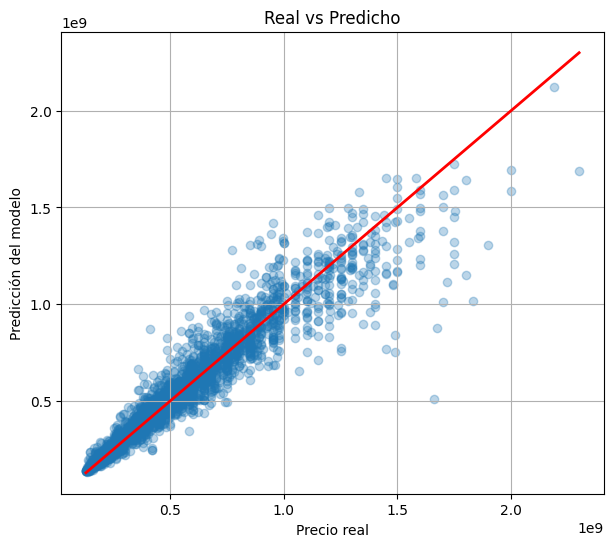

In [47]:

plt.figure(figsize=(7, 6))
plt.scatter(y_test, preds_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Precio real")
plt.ylabel("Predicción del modelo")
plt.title("Real vs Predicho")
plt.grid(True)
plt.show()


En este caso, se observa una tendencia correcta, aunque con mayor dispersión en los precios altos, lo cual es normal porque son los más difíciles de predecir y suelen tener mayor variabilidad.

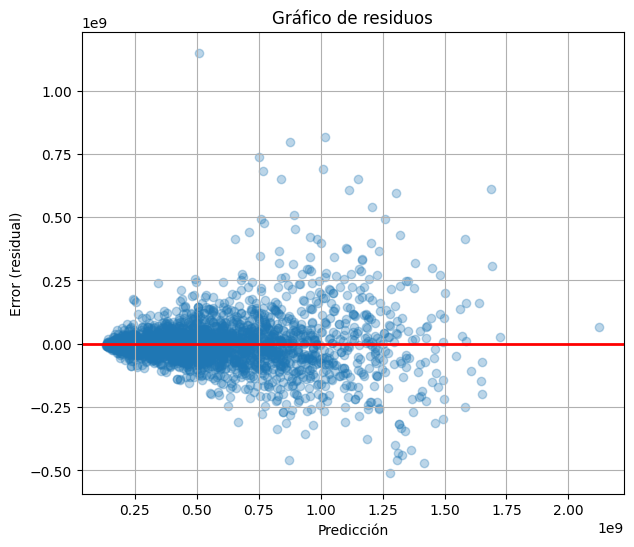

In [48]:

residuals = y_test - preds_test

plt.figure(figsize=(7, 6))
plt.scatter(preds_test, residuals, alpha=0.3)
plt.axhline(0, color='r', lw=2)
plt.xlabel("Predicción")
plt.ylabel("Error (residual)")
plt.title("Gráfico de residuos")
plt.grid(True)
plt.show()


Se graficaron los errores vs la prediccion. Los errores se concentran cerca de cero, lo cual es positivo, aunque se observan residuos más grandes en valores altos, lo que confirma que la variabilidad del mercado en precios elevados genera mayor dificultad para el modelo.

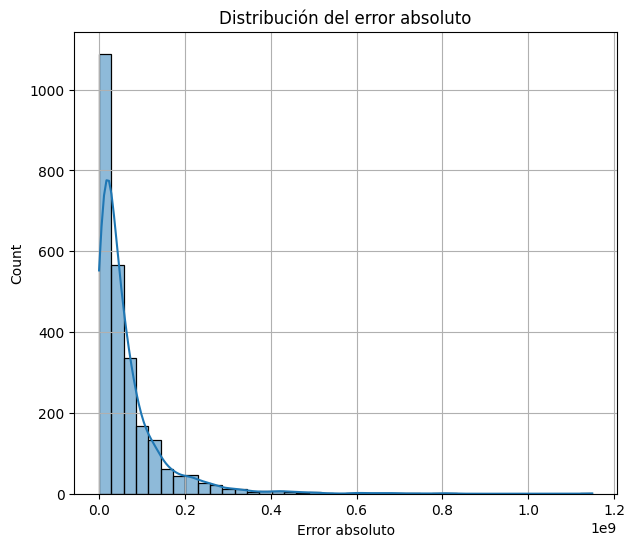

In [49]:
plt.figure(figsize=(7, 6))
sns.histplot(df_eval["abs_error"], bins=40, kde=True)
plt.xlabel("Error absoluto")
plt.title("Distribución del error absoluto")
plt.grid(True)
plt.show()

En la distribcion del error podemos observar que la mayoria se concentra en errores pequeños pero tenemos una barra significativamente alta que nos indica que hay predicciones donde se equivoca por un valor mucho mas alto. Esto puede sugerirnos que efectivamente hay datos con un valor muy grande como apartamentos de lujo que afectan el comportamiento del modelo y no los interpreta de la mejor manera

## 3.2 Conclusiones y elección del mejor modelo

El proceso completo de análisis confirmó que XGBoost Regressor es el modelo con mejor desempeño para predecir el precio de los apartamentos. Sus métricas muestran un comportamiento estable tanto en validación como en prueba, con un VAL–MAE de 62,860,722.91, TEST–MAE de 63,761,831.44, VAL–RMSE de 100,473,247.14 y TEST–RMSE de 106,725,734.53, valores que resultaron muy similares frente a los obtenidos por CatBoost, en donde se obtuvo un VAL–MAE de 63,499,957.09, TEST–MAE de 65,143,011.05, VAL–RMSE de 101,254,946.75 y TEST–RMSE de 106,466,539.47 . Además, los residuos del modelo se concentran alrededor de cero y la relación entre valores reales y predichos evidencia un ajuste sólido en casi todo el rango, excepto en propiedades de precios muy altos donde la variabilidad natural del mercado aumenta el error. Con esta comparación, se confirma que XGBoost generaliza mejor y captura de manera más consistente los patrones del dataset, por lo que se selecciona como el modelo final.

# 4. Interpretabilidad Lime - Shaply

In [50]:
preprocessor = pipeline_xgb.named_steps["preprocessor"]
model = pipeline_xgb.named_steps["model"]

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)


if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()

if hasattr(X_test_transformed, "toarray"):
    X_test_transformed = X_test_transformed.toarray()

num_cols = numeric_features
cat_encoder = preprocessor.named_transformers_["cat"]
cat_cols = cat_encoder.get_feature_names_out(categorical_features)
feature_names = list(num_cols) + list(cat_cols)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=feature_names,
    mode='regression',
    discretize_continuous=True
)

idx = 20
instance_transformed = X_test_transformed[idx]

pred_price = model.predict(instance_transformed.reshape(1, -1))[0]
print("Predicción del modelo:", pred_price)

def model_predict_transformed(x):
    return model.predict(x)

exp = explainer.explain_instance(
    instance_transformed,
    model_predict_transformed,
    num_features=12,
    num_samples=500
)

print("Local fidelity (R²):", exp.score)

exp.show_in_notebook(show_table=True, show_all=False)



Predicción del modelo: 828538750.0
Local fidelity (R²): 0.13338251589882144


Se realizo lime sobre un caso x del data set. En este caso particular, el modelo incrementa fuertemente el valor predicho debido a la localidad del inmueble, un costo de administración elevado, algunas categorías de antigüedad y la cantidad de parqueaderos. Por el contrario, la ausencia o bajo valor de terraza y ciertas categorías de antigüedad reducen el precio estimado. La fidelidad local baja **R²** solo indica que la explicación lineal no logra imitar completamente el comportamiento complejo del modelo, lo cual es normal en modelos no lineales como XGBoost.

In [51]:
shap.initjs()

preprocessor = pipeline_xgb.named_steps["preprocessor"]
model        = pipeline_xgb.named_steps["model"]

X_train_tf = preprocessor.transform(X_train)
X_test_tf  = preprocessor.transform(X_test)

if hasattr(X_train_tf, "toarray"):
    X_train_tf = X_train_tf.toarray()
if hasattr(X_test_tf, "toarray"):
    X_test_tf = X_test_tf.toarray()

num_cols = numeric_features

cat_cols = preprocessor.named_transformers_["cat"] \
                        .get_feature_names_out(categorical_features)

feature_names = list(num_cols) + list(cat_cols)

X_test_tf = pd.DataFrame(X_test_tf, columns=feature_names)


explainer = shap.TreeExplainer(model)

N = min(300, X_test_tf.shape[0])

shap_values = explainer(X_test_tf.iloc[:N], check_additivity=False)


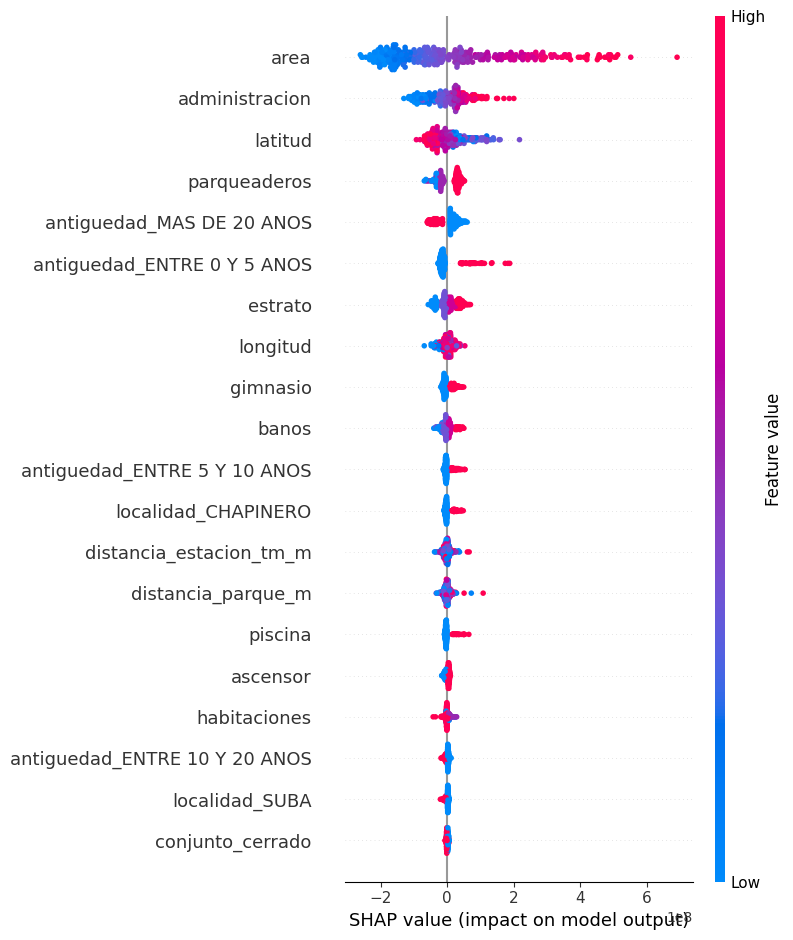

In [52]:
shap.summary_plot(
    shap_values.values,
    X_test_tf.iloc[:N].values,
    feature_names=feature_names,
    plot_type="dot"
)


El gráfico SHAP muestra cómo cada variable empuja la predicción del precio hacia arriba o hacia abajo según su valor. Las áreas grandes, las cuotas altas de administración y un mayor número de parqueaderos generan impactos positivos fuertes en el precio, mientras que las áreas pequeñas, la administración baja y pocos parqueaderos reducen claramente la predicción. Esto coincide con la lógica del mercado inmobiliario.
Las coordenadas de latitud y longitud también son muy importantes porque capturan la ubicación y permiten diferenciar zonas costosas de otras más económicas. En cuanto a la antigüedad, valores altos como “más de 20 años” suelen aparecer con impacto negativo, es decir, empujan la predicción hacia abajo. Los rangos intermedios o menores pueden tener efectos más suaves según el sector.
Otras variables como baños, estrato, piscina, ascensor o gimnasio sí aportan al valor aunque su impacto es menor y más disperso. En general muchos puntos se concentran cerca de cero, lo que muestra que, aunque el modelo detecta patrones claros en tamaño, costos de administración, antigüedad y ubicación, el precio de la vivienda también depende de factores que no están en el dataset, como acabados, remodelaciones, vista o estado del edificio. Esto genera una variabilidad natural en las predicciones.

In [53]:

sample_index = 10

print("Precio real:", y_test.iloc[sample_index])
print("Precio predicho:", pipeline_xgb.predict(X_test.iloc[[sample_index]])[0])



Precio real: 392000000.0
Precio predicho: 345075900.0


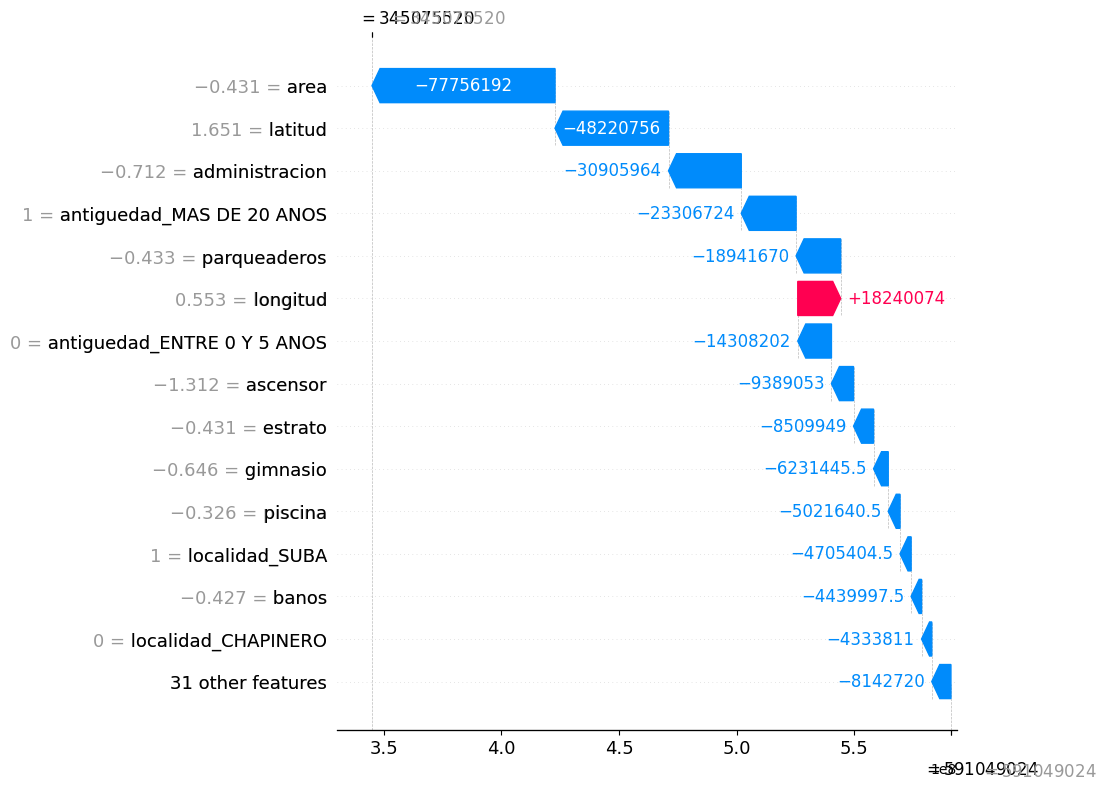

In [54]:
fig = shap.plots.waterfall(shap_values[sample_index], max_display=15)




El gráfico tipo waterfall muestra cómo el modelo ajustó el precio desde el valor base hasta llegar a la predicción final, revelando que múltiples características del inmueble empujaron el valor hacia abajo. La área reducida, una administración baja, la antigüedad mayor a 20 años y coordenadas que corresponden a zonas de menor valoración restaron millones a la estimación, mientras que solo la longitud aportó un pequeño aumento en el precio. En conjunto, la suma de efectos negativos fue mucho mayor que la positiva, haciendo que el modelo predijera un valor inferior al precio real del apartamento.

Generación de valor

In [55]:
df_valor=df_eval.copy()

Se calula el error relativo para observar la diferencia de los precios de la predicción que pueden estar sobre estimados

In [56]:
df_valor['diferencia']=df_valor['real']-df_valor['pred']

In [57]:
df_valor.min()

,0
real,128100000.0
pred,134228640.0
abs_error,9616.0
diferencia,-509039232.0


Se calcula el porcentaje absoluto de la diferencia, con el cual se puede analizar la proporción de cada uno de las predicciones y establecer un umbral para que el périto intervenga cuando exista una sobreestimación significativa.

In [58]:
df_valor['ratio']=np.abs(df_valor['real']-df_valor['pred'])/df_valor['real']

In [59]:
min_diferencia_record = df_valor[df_valor['diferencia'] == df_valor['diferencia'].min()]
print("Record with minimum 'diferencia':")
display(min_diferencia_record)

Record with minimum 'diferencia':


,real,pred,abs_error,diferencia,ratio
25457,770000000.0,1.279039e+09,509039232.0,-509039232.0,0.66109


Se validan que todos los errores relativos menores a 20M tomen una valoración inicial de una hora

In [60]:

df_valor['tiempo_peritov1'] = np.where(

    ((df_valor['diferencia']) <= 20000000),
    1, 6
)


Se agrega una nueva regla en la que el porcentaje de los valores sobre estimados no supere el 10% y deba ser evaluado por el périto presencialmente.

In [61]:
umbral_sobreestimado=0.10

In [62]:
df_valor['tiempo_peritov2'] = np.where(
  (df_valor['tiempo_peritov1'] == 1) & ((df_valor['diferencia'] < 0) & (df_valor['ratio'] > umbral_sobreestimado)),
    6, df_valor['tiempo_peritov1']
)

In [63]:
df_valor.head()

,real,pred,abs_error,diferencia,ratio,tiempo_peritov1,tiempo_peritov2
17160,6.800000e+08,9.467171e+08,266717056.0,-266717056.0,0.392231,1,6
7034,1.280000e+09,1.391109e+09,111108736.0,-111108736.0,0.086804,1,1
3112,8.500000e+08,7.633566e+08,86643392.0,86643392.0,0.101933,6,6
24783,1.900000e+08,1.636523e+08,26347696.0,26347696.0,0.138672,6,6
24384,3.100000e+08,3.218612e+08,11861248.0,-11861248.0,0.038262,1,1


Se construye la matriz sobre la cual se van a realizar los cálculos de tiempo requerido por el périto para cada uno de los avalúos de los predios evaluados por el modelo.

In [64]:
from sklearn.metrics import confusion_matrix, classification_report


# Condiciones para la matriz de confusión
condicion_diferencia = df_valor['abs_error'] > 20000000  # Condición real
condicion_tiempo_6h_v2 = df_valor['tiempo_peritov2'] == 6  # Nueva predicción

# Crear matriz de confusión
cm = confusion_matrix(condicion_diferencia, condicion_tiempo_6h_v2)

# Crear DataFrame para mejor visualización
confusion_df = pd.DataFrame(
    cm,
    index=['Real: ≤ 20M', 'Real: > 20M'],
    columns=['Pred: 1h', 'Pred: 6h']
)

print("# Matriz de Confusión - Con tiempo_perito")
print("=" * 50)
print(confusion_df)

# Versión formateada
print("\n# Matriz de Confusión Formateada")
print("| {:20} | {:>15} | {:>15} |".format('', 'Pred: 1h', 'Pred: 6h'))
print("|{}-|{}-|{}-|".format('-'*21, '-'*17, '-'*17))
print("| {:20} | {:>15} | {:>15} |".format(
    'Real: ≤ 20M', confusion_df.iloc[0, 0], confusion_df.iloc[0, 1]))
print("| {:20} | {:>15} | {:>15} |".format(
    'Real: > 20M', confusion_df.iloc[1, 0], confusion_df.iloc[1, 1]))

# Métricas de clasificación
print("\n# Reporte de Clasificación")
print(classification_report(condicion_diferencia, condicion_tiempo_6h_v2,
                          target_names=['Diferencia ≤ 20M', 'Diferencia > 20M']))

# Interpretación de la matriz
print("\n# Interpretación:")
print(f"Verdaderos Negativos (VN): {cm[0,0]} - Correctamente en 1h cuando ≤ 20M")
print(f"Falsos Positivos (FP):    {cm[0,1]} - Incorrectamente en 6h cuando ≤ 20M y el margen de error es menor al 10%")
print(f"Falsos Negativos (FN):    {cm[1,0]} - Incorrectamente en 1h cuando > 20M y el margen de error es mayor al 10%")
print(f"Verdaderos Positivos (VP): {cm[1,1]} - Correctamente en 6h cuando > 20M")

# Estadísticas adicionales
total = cm.sum()
print(f"\n# Estadísticas:")
print(f"Total observaciones: {total}")
print(f"Porcentaje asignado a 6h: {(cm[0,1] + cm[1,1]) / total * 100:.1f}%")
print(f"Porcentaje asignado a 1h: {(cm[0,0] + cm[1,0]) / total * 100:.1f}%")

# Matriz de Confusión - Con tiempo_perito
             Pred: 1h  Pred: 6h
Real: ≤ 20M       827         8
Real: > 20M       347      1372

# Matriz de Confusión Formateada
|                      |        Pred: 1h |        Pred: 6h |
|----------------------|------------------|------------------|
| Real: ≤ 20M          |             827 |               8 |
| Real: > 20M          |             347 |            1372 |

# Reporte de Clasificación
                  precision    recall  f1-score   support

Diferencia ≤ 20M       0.70      0.99      0.82       835
Diferencia > 20M       0.99      0.80      0.89      1719

        accuracy                           0.86      2554
       macro avg       0.85      0.89      0.85      2554
    weighted avg       0.90      0.86      0.87      2554


# Interpretación:
Verdaderos Negativos (VN): 827 - Correctamente en 1h cuando ≤ 20M
Falsos Positivos (FP):    8 - Incorrectamente en 6h cuando ≤ 20M y el margen de error es menor al 10%
Falsos Negativos

Se puede concluir que el périto va a tener una confianza del 99% sobre los predios que requerirán un avalúo presencial y se requiera emplear 6 horas de su tiempo, mientras que para los falsos negativos, se necesita validar con el negocio si el umbral escogido es el  adecuado para que el périto deba realizar un avalúo presencial.

# Insights

El modelo responde adecuadamente a los datos provistos inicialmente, lo cual facilita las predicciones especialmente para propiedades cuyo poder adquisitivo es catalogado como alto.

Por otra parte, se recomienda establecer parámetros claros con el cliente al momento de rellenar los datos de la propiedad para que las características del inmueble como el del entorno sean lo más cercanas a la realidad para reducir el tiempo invertido del périto para realizar avalúos.